In [52]:
#Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)


#Reading the data
df=pd.read_csv(r'C:\Users\marcv\Desktop\movies.csv')


In [53]:
#Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Checking for missing data
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [54]:
# Dealing with missings. Released
df['released'].fillna(df['year'], inplace=True)

# We replace the missing values in released by the year value


df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [55]:
# Dealing with missings. Budget and Gross
df['budget'].fillna(value=df['budget'].median(), inplace=True)
df['gross'].fillna(value=df['gross'].median(), inplace=True)

#We replace missing values with median of the variable

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [56]:
# Dealing with missings. Other variables
df.dropna(inplace=True)
# Since there are few missings in other variables we can afford to drop them
df.isnull().sum()


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [58]:
# Checking data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [61]:
#Changing data types of some columns to fix .0 in integers.

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [68]:
# Drop duplicates

df.drop_duplicates()
df.count()

# End of data cleaning

name        7574
rating      7574
genre       7574
year        7574
released    7574
score       7574
votes       7574
director    7574
writer      7574
star        7574
country     7574
budget      7574
gross       7574
company     7574
runtime     7574
dtype: int64

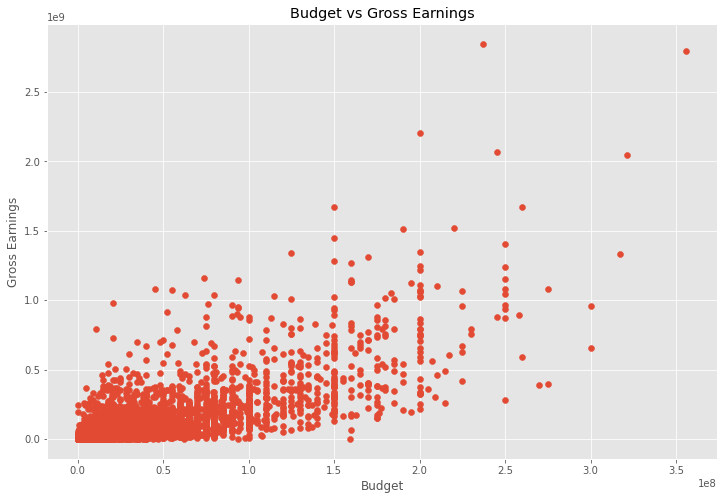

In [70]:
# CORRELATION
# Comparing budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

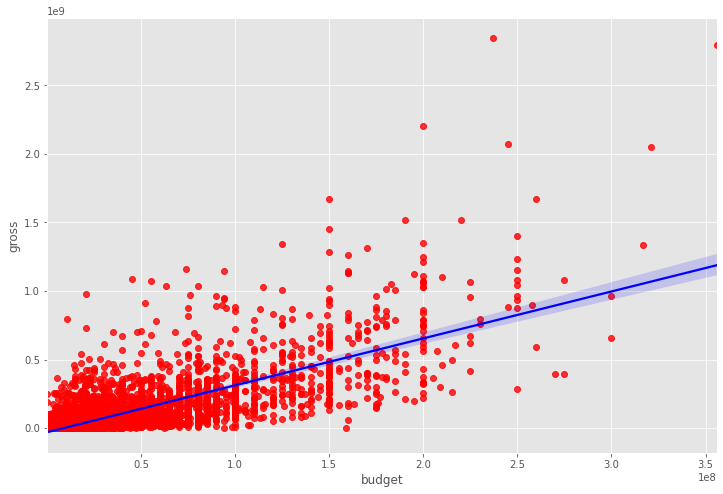

In [72]:
# Plotting with seaborn to see fitted line
sns.regplot(x='budget',
            y='gross',
            data=df,
            scatter_kws={'color':'red'},
            line_kws={'color':'blue'})

In [73]:
# Looking at correlation directly
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.296131,0.262150,0.120676
score,0.102346,1.000000,0.411931,0.062535,0.187523,0.400574
votes,0.226895,0.411931,1.000000,0.460066,0.632332,0.309366
budget,0.296131,0.062535,0.460066,1.000000,0.746373,0.273902
gross,0.262150,0.187523,0.632332,0.746373,1.000000,0.244201
runtime,0.120676,0.400574,0.309366,0.273902,0.244201,1.000000


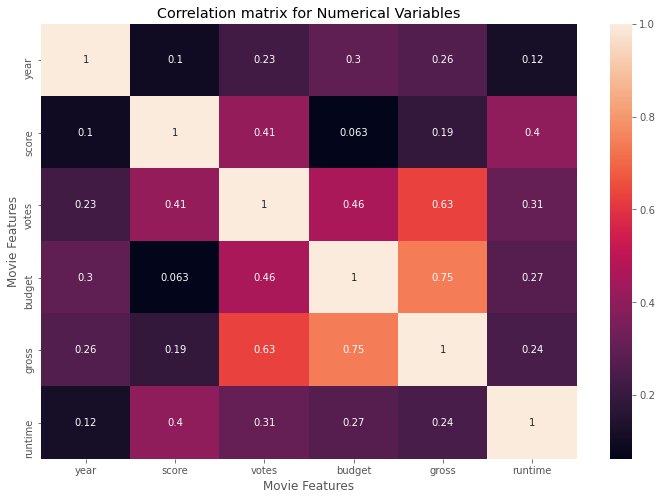

In [75]:
# Visualizing the correlations

correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numerical Variables')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [77]:
#Categorizing object variables to see their correlation too

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6506,6,6,1980,1685,8.4,927000,2544,3958,1022,54,19000000,46998772,2273,146
1,5498,6,1,1980,1472,5.8,65000,2233,1612,316,55,4500000,58853106,710,104
2,5073,4,0,1980,1751,8.7,1200000,1093,2534,1708,55,18000000,538375067,1505,124
3,282,4,4,1980,1472,7.7,221000,1279,1975,2197,55,3500000,83453539,1769,88
4,1016,6,4,1980,1523,7.3,108000,1037,511,398,55,6000000,39846344,1736,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700,1076,1652,2747,8,80000000,461421559,360,149
7653,6399,6,5,2020,91,5.4,2400,2475,3827,2385,55,20500000,3661,1860,98
7656,6936,5,4,2020,1865,5.0,294,2470,3820,2326,55,20500000,413378,1862,120
7658,789,6,6,2020,1091,6.6,35,1739,1051,515,55,5000,20205757,1709,78


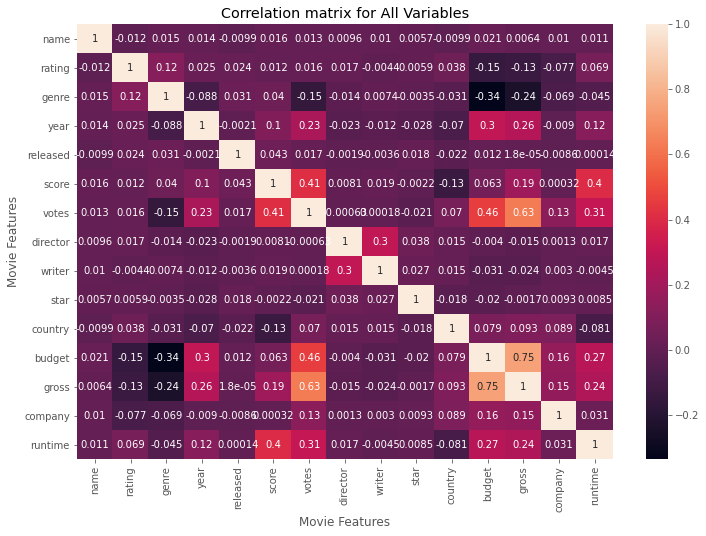

In [80]:
correlation_matrix2=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix2, annot=True)

plt.title('Correlation matrix for All Variables')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [91]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
high_correlation = corr_pairs[(corr_pairs) > 0.4]
high_correlation

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
          votes       0.411931
          runtime     0.400574
votes     score       0.411931
          votes       1.000000
          budget      0.460066
          gross       0.632332
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    votes       0.460066
          budget      1.000000
          gross       0.746373
gross     votes       0.632332
          budget      0.746373
          gross       1.000000
company   company     1.000000
runtime   score       0.400574
          runtime     1.000000
dtype: float64